<a href="https://colab.research.google.com/github/robertozerbini/blog/blob/main/Roberto_Zerbini_Blog_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#imports
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Sigmoid

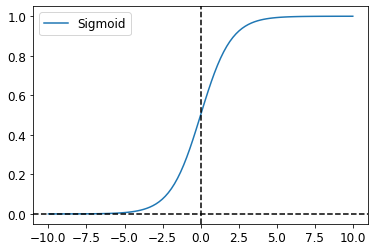

In [27]:
#sigmoid function
X = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-X))

fig, ax = plt.subplots()
ax.plot(X , y, label="Sigmoid")
ax.legend(loc="upper left", fontsize=12)

#ax.grid(True, which='both')
ax.axhline(y=0, color='k', ls = '--')
ax.axvline(x=0, color='k', ls = '--')

Binary Classifier: Iris Dataset

In [28]:
from sklearn import datasets 
iris = datasets.load_iris() 
#list(iris.keys()) 
X = iris['data']
y = iris['target']

In [29]:
#get 2 features to be plotted in a 2 d space and 2 instances 
#because we are considering a binary classifier
feature1=2
feature2=3
X = X[y>0,feature1:feature2+1]
y = y[y>0]

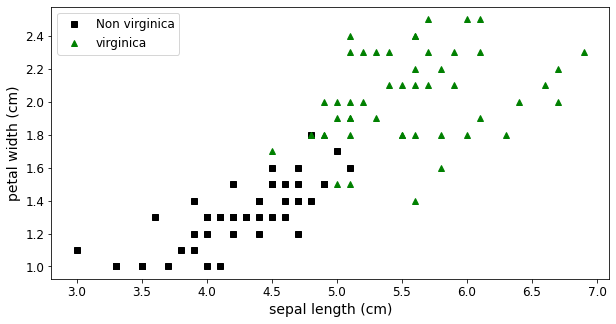

In [30]:
plt.figure(figsize=(10, 5))
#plt.plot(X[y==0, feature1-feature1], X[y==0, feature1-feature2], "yo", label=iris['target_names'][0])
plt.plot(X[y==1, feature1-feature1], X[y==1, feature1-feature2], "ks", label='Non ' + iris['target_names'][2])
plt.plot(X[y==2, feature1-feature1], X[y==2, feature1-feature2], "g^", label=iris['target_names'][2])
plt.xlabel(iris['feature_names'][feature1-feature1], fontsize=14)
plt.ylabel(iris['feature_names'][feature1-feature2], fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression() 
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
log_reg.score(X,y)

0.95

In [33]:
#Theta1 x1 + Theta2 x2 + b = 0
#x1 = (Theta2 x2 + b) / Theta1
-(log_reg.coef_[0][0] * np.linspace(4,6,2) + log_reg.intercept_[0]) / log_reg.coef_[0][1]

array([2.69855979, 0.36994384])

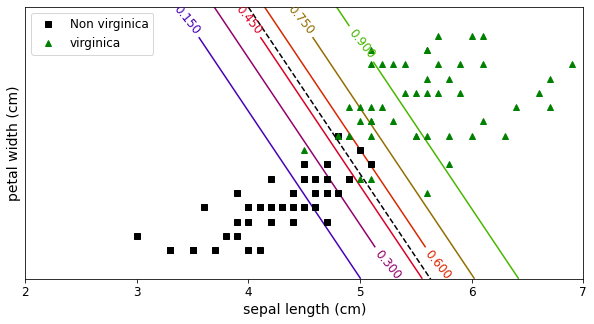

In [35]:
X_line = np.linspace(4,6,2)

#set contours
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

#plot 
plt.figure(figsize=(10, 5))
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(X[y==1, feature1-feature1], X[y==1, feature1-feature2], "ks", label='Non ' + iris['target_names'][2])
plt.plot(X[y==2, feature1-feature1], X[y==2, feature1-feature2], "g^", label=iris['target_names'][2])
plt.plot(X_line, -(log_reg.coef_[0][0] * X_line + log_reg.intercept_[0]) / log_reg.coef_[0][1] , 'k--','Decision Boundary')
plt.xlabel(iris['feature_names'][feature1-feature1], fontsize=14)
plt.ylabel(iris['feature_names'][feature1-feature2], fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.axis([2, 7, 0.8, 2.7])
plt.show()

Multi-Class Classification

In [44]:
X = iris['data']
X = X[:,feature1:feature2+1]
y = iris['target']

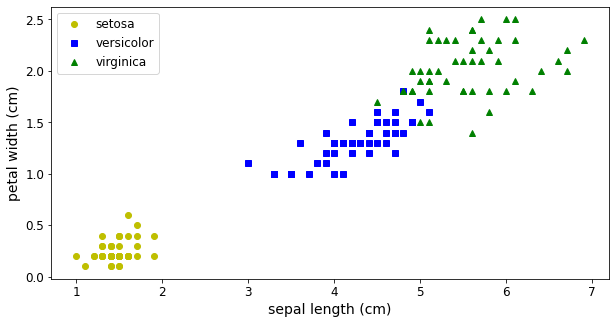

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(X[y==0, feature1-feature1], X[y==0, feature1-feature2], "yo", label=iris['target_names'][0])
plt.plot(X[y==1, feature1-feature1], X[y==1, feature1-feature2], "bs", label=iris['target_names'][1])
plt.plot(X[y==2, feature1-feature1], X[y==2, feature1-feature2], "g^", label=iris['target_names'][2])
plt.xlabel(iris['feature_names'][feature1-feature1], fontsize=14)
plt.ylabel(iris['feature_names'][feature1-feature2], fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs') 
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
log_reg.score(X,y)

0.9666666666666667

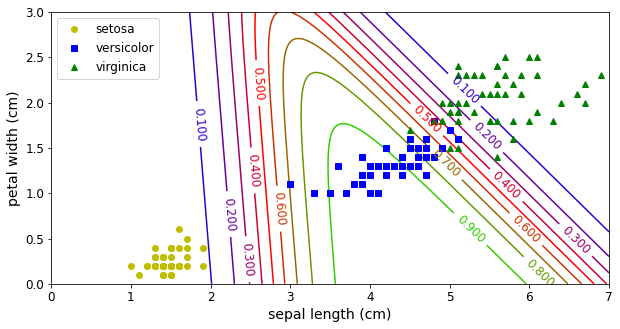

In [58]:
X_line = np.linspace(4,6,2)

#set contours
x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

#plot 
plt.figure(figsize=(10, 5))
contour = plt.contour(x0, x1, zz, 10, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(X[y==0, feature1-feature1], X[y==0, feature1-feature2], "yo", label=iris['target_names'][0])
plt.plot(X[y==1, feature1-feature1], X[y==1, feature1-feature2], "bs", label=iris['target_names'][1])
plt.plot(X[y==2, feature1-feature1], X[y==2, feature1-feature2], "g^", label=iris['target_names'][2])
plt.xlabel(iris['feature_names'][feature1-feature1], fontsize=14)
plt.ylabel(iris['feature_names'][feature1-feature2], fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.axis([0, 7, 0, 3])
plt.show()


Check my blog: https://robertozerbini.blogspot.com/